In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [171]:
df=pd.read_csv("C:\\Users\\zkyaf\\Downloads\\archive (3)\\animal_disease_dataset.csv")

In [172]:
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


In [173]:
df.shape

(43778, 7)

In [174]:
label_encoder=LabelEncoder()
df['Disease']= label_encoder.fit_transform(df['Disease'])
df['Animal']= label_encoder.fit_transform(df['Animal'])
df['Symptom 1']= label_encoder.fit_transform(df['Symptom 1'])
df['Symptom 2']= label_encoder.fit_transform(df['Symptom 2'])
df['Symptom 3']= label_encoder.fit_transform(df['Symptom 3'])

In [175]:
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,1,3,103.1,7,12,11,4
1,0,13,104.5,12,11,7,3
2,3,1,100.5,7,12,11,3
3,1,14,100.3,11,21,6,1
4,3,2,103.6,12,11,7,4


In [176]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [178]:
mms=MinMaxScaler()
x_trainn=mms.fit_transform(x_train)
x_testt=mms.transform(x_test)

In [179]:
model=Sequential()

model.add(Dense(200,activation='relu',input_dim=6))
model.add(Dense(150,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(5,activation='softmax'))

C:\Users\zkyaf\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 200)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 80)             │        12,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 50)             │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,935 (187.25 KB)

 Trainable params: 47,935 (187.25 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [182]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [183]:
history = model.fit(x_trainn, y_train, validation_data=(x_testt, y_test), epochs=500, callbacks=callback)

Epoch 1/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4724 - loss: 1.0967 - val_accuracy: 0.7639 - val_loss: 0.4133
Epoch 2/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7984 - loss: 0.3496 - val_accuracy: 0.8259 - val_loss: 0.2664
Epoch 3/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8246 - loss: 0.2618 - val_accuracy: 0.8339 - val_loss: 0.2397
Epoch 4/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8265 - loss: 0.2668 - val_accuracy: 0.8291 - val_loss: 0.2493
Epoch 5/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8303 - loss: 0.2568 - val_accuracy: 0.8346 - val_loss: 0.2321
Epoch 6/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8330 - loss: 0.2510 - val_accuracy: 0.8346 - val_loss: 0.2301
Epoch 7/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8313 - loss: 0.2336 - val_accuracy: 0.8357 - val_loss: 0.2325
Epoch 8/500
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8303 - loss: 

In [184]:
y_pred = model.predict(x_testt)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [185]:
y_pred = y_pred.argmax(axis=1)

In [186]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,y_pred)*100,2)

83.57

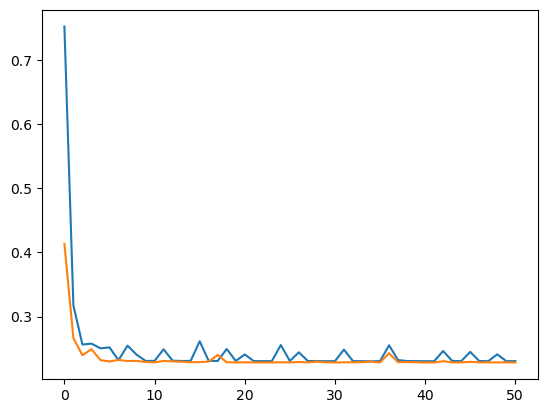

In [187]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

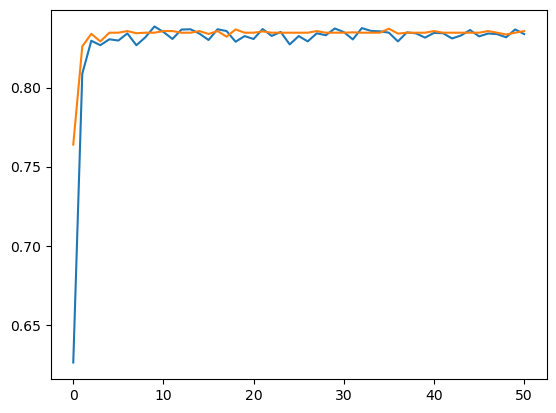

In [188]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])